# 환경설정

In [ ]:
import pandas as pd
import geopandas as gpd

import random
import numpy as np
random.seed(10)
np.random.seed(100)

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors

from pysal.lib  import weights
from esda.moran import Moran, Moran_Local

from splot.esda import moran_scatterplot,lisa_cluster, plot_local_autocorrelation

## 데이터

In [ ]:
df = gpd.read_file('fin_df.geojson')
df['sales_est_amt_total'] = df.iloc[:,28:43].sum(axis=1)  # 전체 매출액 합 컬럼 생성
df.head(n=3)

,gid500,all_cnt,old_cnt,adult_cnt,young_cnt,건물연면적,ws_cnt,found_age_1,found_age_2,found_age_3,...,cnt_subway,cnt_clinic,cnt_hospital,cnt_element_s,cnt_middles_s,cnt_high_s,cnt_university,cnt_landmark,geometry,sales_est_amt_total
0,다바66a99a,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,"POLYGON ((127.11743 37.08901, 127.11741 37.093...",0.0
1,다바66a99b,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,"POLYGON ((127.11741 37.09352, 127.11738 37.098...",0.0
2,다바66b99a,88.0,13.0,56.0,0.0,1781.97,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,"POLYGON ((127.12306 37.08903, 127.12303 37.093...",0.0


In [ ]:
table = pd.read_csv('grid행정동변환.csv')
table.columns = ['gid500','ADM_DR_CD','ADM_DR_NM']
table.head()

,gid500,ADM_DR_CD,ADM_DR_NM
0,다사71b21b,3119111.0,포곡읍
1,다사75b22a,3119111.0,포곡읍
2,다사71b20a,3119111.0,포곡읍
3,다사76a18a,3119111.0,포곡읍
4,다사74b21b,3119111.0,포곡읍


In [ ]:
df_dong = pd.merge(df,table,on='gid500')
df_dong.head(n=3)

,gid500,all_cnt,old_cnt,adult_cnt,young_cnt,건물연면적,ws_cnt,found_age_1,found_age_2,found_age_3,...,cnt_hospital,cnt_element_s,cnt_middles_s,cnt_high_s,cnt_university,cnt_landmark,geometry,sales_est_amt_total,ADM_DR_CD,ADM_DR_NM
0,다바66a99a,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,"POLYGON ((127.11743 37.08901, 127.11741 37.093...",0.0,NaN,NaN
1,다바66a99b,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,"POLYGON ((127.11741 37.09352, 127.11738 37.098...",0.0,NaN,NaN
2,다바66b99a,88.0,13.0,56.0,0.0,1781.97,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,"POLYGON ((127.12306 37.08903, 127.12303 37.093...",0.0,3119132.0,남사면


# Exploraty Spatial Data Analysis (ESDA)

### DATA

In [ ]:
temp_dong = df_dong.copy()
temp_dong = temp_dong[['gid500','ADM_DR_NM','sales_est_amt_total','geometry']]
temp_dong = temp_dong.dropna()  # 행정동이 nan인 데이터 제거
temp_dong.head()

,gid500,ADM_DR_NM,sales_est_amt_total,geometry
2,다바66b99a,남사면,0.0,"POLYGON ((127.12306 37.08903, 127.12303 37.093..."
3,다바66b99b,남사면,0.0,"POLYGON ((127.12303 37.09353, 127.12301 37.098..."
4,다바67a99a,남사면,0.0,"POLYGON ((127.12868 37.08905, 127.12866 37.093..."
5,다바67a99b,남사면,0.0,"POLYGON ((127.12866 37.09355, 127.12864 37.098..."
7,다바67b99a,남사면,0.0,"POLYGON ((127.13431 37.08906, 127.13429 37.093..."


### Local Spatial Autocorrelation

In [ ]:
random.seed(10)
np.random.seed(100)

w = weights.contiguity.Queen.from_dataframe(temp_dong) # 가중치 행렬 생성
w.transform = 'r'
y = temp_dong['sales_est_amt_total'].values

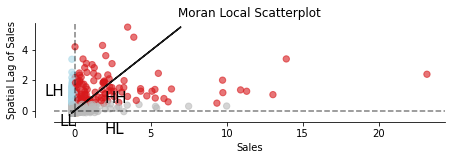

In [ ]:
random.seed(10)
np.random.seed(100)

moran_loc = Moran_Local(y, w)  # 국지적 모란 지수
fig, ax = moran_scatterplot(moran_loc, p=0.05)
ax.set_xlabel('Sales')
ax.set_ylabel('Spatial Lag of Sales')
plt.text(1.95, 0.5, "HH", fontsize=15)
plt.text(1.95, -1.5, "HL", fontsize=15)
plt.text(-2, 1, "LH", fontsize=15)
plt.text(-1, -1, "LL", fontsize=15)
plt.show()

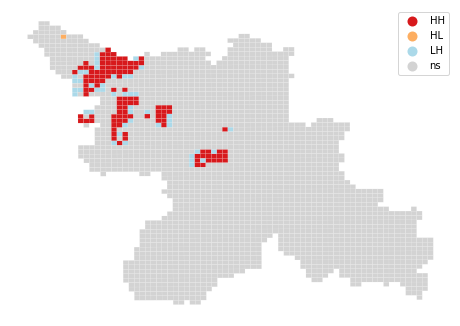

In [ ]:
lisa_cluster(moran_loc, temp_dong, p=0.05, figsize = (8,8))  # 공간적 군집분석 결과 시각화
plt.show()

/opt/app-root/lib/python3.6/site-packages/mapclassify/classifiers.py:236: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/opt/app-root/lib/python3.6/site-packages/mapclassify/classifiers.py:238: UserWarning: Warning: setting k to 2
  Warn("Warning: setting k to %d" % k_q, UserWarning)


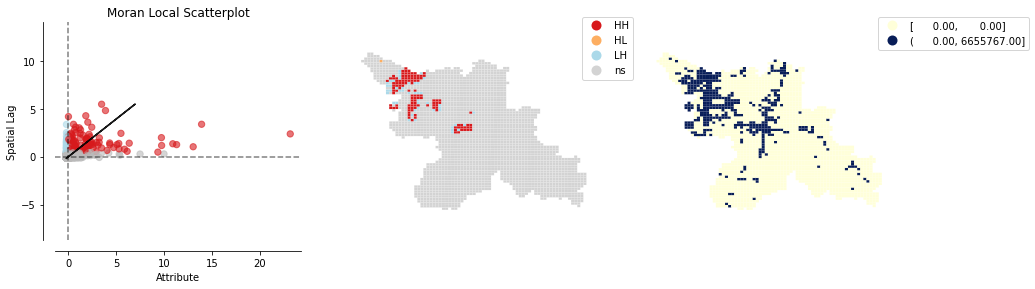

In [ ]:
plot_local_autocorrelation(moran_loc, temp_dong, 'sales_est_amt_total')
plt.show()

### significant hot spot

In [ ]:
(moran_loc.p_sim < 0.05).sum()  # p-value 0.05하에서 유의미한 행 164래

164

In [ ]:
sig = moran_loc.p_sim < 0.05
hotspot = sig * moran_loc.q==1
coldspot = sig * moran_loc.q==3
doughnut = sig * moran_loc.q==2
diamond = sig * moran_loc.q==4

In [ ]:
spots = ['no_sig.', 'hot spot']
labels = [spots[i] for i in hotspot*1]

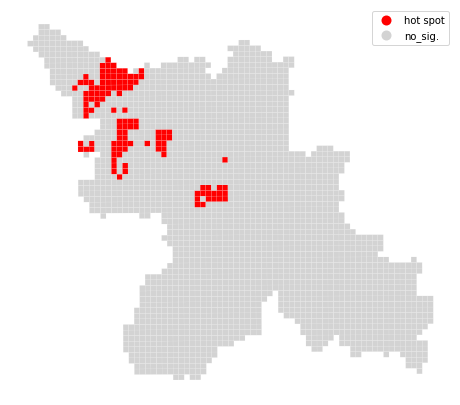

In [ ]:
hmap = colors.ListedColormap(['red', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(8,8))
temp_dong.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()  # p-value 0.05 하에서 유의미한 핫스팟 지역

In [ ]:
spots_num = [0,1]
labels_num = [spots_num[i] for i in hotspot*1]

In [ ]:
temp_dong['hotspot']=labels_num  # 핫스팟 여부 0 또는 1 숫자로 변환하여 저장
temp_dong.head()

,gid500,ADM_DR_NM,sales_est_amt_total,geometry,w_sales,hotspot
2,다바66b99a,남사면,0.0,"POLYGON ((127.12306 37.08903, 127.12303 37.093...",0.0,0
3,다바66b99b,남사면,0.0,"POLYGON ((127.12303 37.09353, 127.12301 37.098...",0.0,0
4,다바67a99a,남사면,0.0,"POLYGON ((127.12868 37.08905, 127.12866 37.093...",0.0,0
5,다바67a99b,남사면,0.0,"POLYGON ((127.12866 37.09355, 127.12864 37.098...",0.0,0
7,다바67b99a,남사면,0.0,"POLYGON ((127.13431 37.08906, 127.13429 37.093...",7493.2,0


In [ ]:
print(len(temp_dong[temp_dong.hotspot==1]))  # 핫스팟 지역 총 117개

117
